In [ ]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Dropout, Flatten, BatchNormalization
from keras.optimizers import Adam
from keras.initializers import  RandomNormal
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import pandas as pd
%matplotlib inline

In [ ]:
# Loading and preprocessing images
data = pd.read_csv("/content/fer2013.csv")

emotions_names = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
data['emotion_name'] = data['emotion'].map(emotions_names)

pixels_values = data.pixels.str.split(" ").tolist()
pixels_values = pd.DataFrame(pixels_values, dtype=int)
images = pixels_values.values
images = images.astype(np.float(64))

test_idx_start = 32298
images_test = images[test_idx_start:]

In [ ]:
df = pd.read_csv('fer2013.csv') #read dataset

df.head(5),df.shape

(   emotion                                             pixels     Usage
 0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
 1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
 2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
 3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
 4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training,
 (35887, 3))

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D,MaxPool2D,ZeroPadding2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import vgg16
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

#for model deployement
import os
import cv2
import numpy as np
from tensorflow.keras.models import model_from_json
from tensorflow.keras.utils import img_to_array

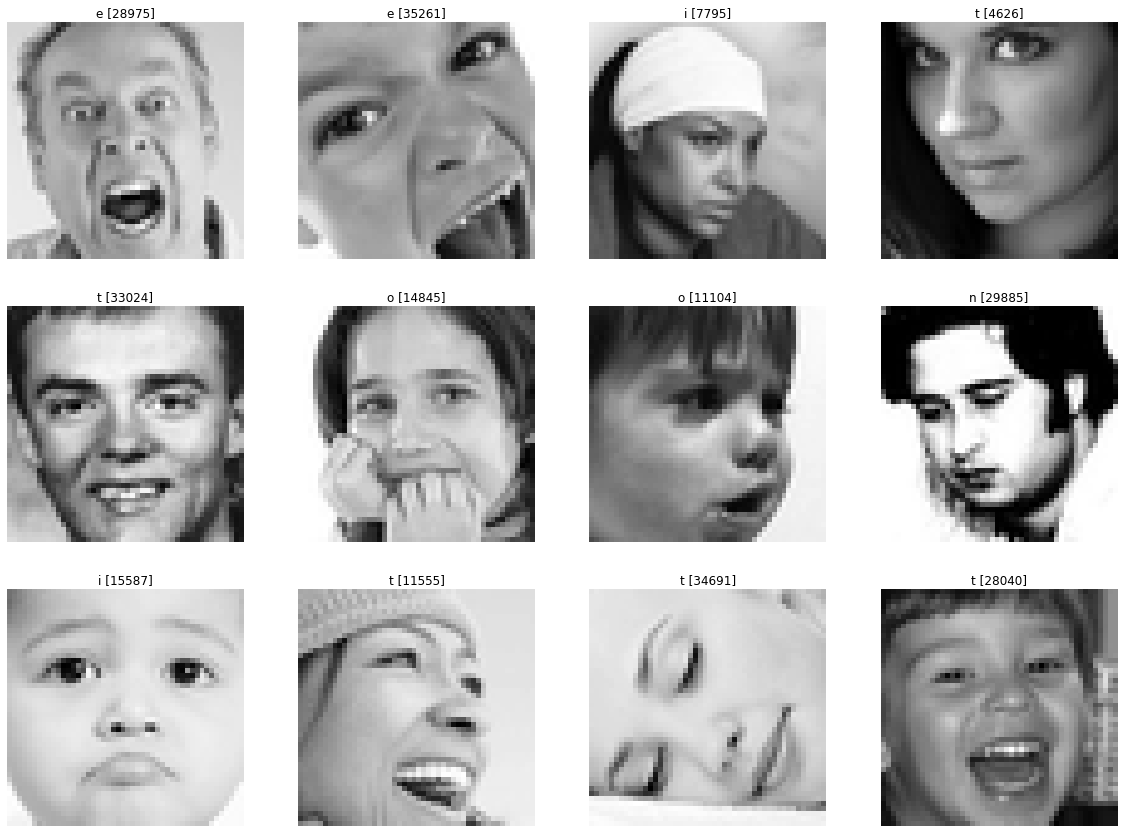

In [ ]:
# from PIL import Image
# pixels = df['pixels'][0]
# b = bytes(int(p) for p in pixels.split())
# i = Image.frombuffer('L',(48,48),b)
# di.save('a.png')
def visualize_images(n_img=4):
    indices = np.random.randint(0,df.shape[0],size=n_img)
#     print(indices)
    plt.figure(figsize=(20,20))
    for i,l in zip(indices,range(0,len(indices))):
        image_ar = np.array([i for i in  df['pixels'][i].split()] , dtype='float')
        pixels = np.reshape(image_ar,(48,48))
        ax = plt.subplot(4,4,l+1)
        plt.imshow(pixels,cmap='gray')
        plt.title('emotion'[df['emotion'][i]]+" ["+str(i)+"]")
        plt.xticks()
        plt.yticks([])
        plt.axis("off")
visualize_images(12)

In [ ]:
X_train,y_train = [],[]
X_val,y_val = [],[]
X_test,y_test = [],[]
for index,row in df.iterrows():
    k = row['pixels'].split(" ")
    if row['Usage'] == 'Training':
        X_train.append(np.array(k))
        y_train.append(row['emotion'])
    elif row['Usage'] == 'PrivateTest':
        X_test.append(np.array(k))
        y_test.append(row['emotion'])
    elif row['Usage'] == 'PublicTest':
        X_val.append(np.array(k))
        y_val.append(row['emotion'])

X_train = np.array(X_train,dtype='float')
y_train = np.array(y_train)
X_test = np.array(X_test,dtype='float')
y_test = np.array(y_test)
X_val = np.array(X_val,dtype='float')
y_val = np.array(y_val)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape

((28709, 2304), (28709,), (3589, 2304), (3589,), (3589, 2304), (3589,))

#### **SVM**

In [ ]:
X_train,y_train = [],[]
X_val,y_val = [],[]
X_test,y_test = [],[]
for index,row in df.iterrows():
    k = row['pixels'].split(" ")
    if row['Usage'] == 'Training' :
        X_train.append(np.array(k))
        y_train.append(row['emotion'])
    elif row['Usage'] == 'PrivateTest' :
        X_test.append(np.array(k))
        y_test.append(row['emotion'])
    elif row['Usage'] == 'PublicTest':
        X_val.append(np.array(k))
        y_val.append(row['emotion'])

X_train = np.array(X_train,dtype='float')
y_train = np.array(y_train)
X_test = np.array(X_test,dtype='float')
y_test = np.array(y_test)
X_val = np.array(X_val,dtype='float')
y_val = np.array(y_val)


In [ ]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

svc=SVC()


# fit classifier to training set
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.4472


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import SGDClassifier
import sklearn.metrics as metrics
import seaborn as sns

In [ ]:
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)



Classification Report

              precision    recall  f1-score   support

           0       0.43      0.22      0.29       491
           1       1.00      0.05      0.10        55
           2       0.39      0.23      0.29       528
           3       0.48      0.72      0.58       879
           4       0.35      0.41      0.38       594
           5       0.65      0.53      0.58       416
           6       0.41      0.44      0.42       626

    accuracy                           0.45      3589
   macro avg       0.53      0.37      0.38      3589
weighted avg       0.45      0.45      0.43      3589



In [ ]:
print ('\n         Confusion Matrix\n' ,confusion_matrix(y_test, y_pred) )


         Confusion Matrix
 [[109   0  46 142  96  20  78]
 [  7   3   3  24   6   2  10]
 [ 39   0 122 131 111  50  75]
 [ 25   0  30 636 101  18  69]
 [ 35   0  50 136 241  11 121]
 [ 13   0  40  68  31 219  45]
 [ 28   0  25 182 101  15 275]]


In [ ]:
y_train_pred = svc.decision_function(X_train)[:,1]
y_test_pred = svc.decision_function(X_test)[:,1]

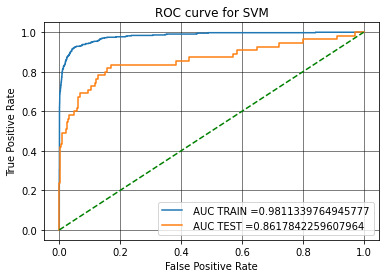

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred,pos_label=1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred, pos_label=1)

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for SVM")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

####**Naive Bayes Algorithm**

In [ ]:
data = df.dropna()
# Model the data using Naive Bayes
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

#  Predict data
y_predict = model.predict(X_test)

#  Create a confusion matrix to check accuracy
print ( pd.crosstab(y_test, y_predict,rownames=['Actual'], colnames=['Predicted'],  margins=True) )

#  Print the accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score

print ('\n         Confusion Matrix\n' ,confusion_matrix(y_test, y_predict) )
print ( '\nAccuracy Score', accuracy_score(y_test,y_predict))

Predicted    0    1    2    3    4    5    6   All
Actual                                            
0           94   58   94   70   24   63   88   491
1            8   14    9   12    0    6    6    55
2           73   59  101   75   19  109   92   528
3          111   71  133  254   36  103  171   879
4           93   77   99   97   46   79  103   594
5           36   31   80   51   16  145   57   416
6           51   76   95  110   24  103  167   626
All        466  386  611  669  165  608  684  3589

         Confusion Matrix
 [[ 94  58  94  70  24  63  88]
 [  8  14   9  12   0   6   6]
 [ 73  59 101  75  19 109  92]
 [111  71 133 254  36 103 171]
 [ 93  77  99  97  46  79 103]
 [ 36  31  80  51  16 145  57]
 [ 51  76  95 110  24 103 167]]

Accuracy Score 0.2287545277235999


In [ ]:
cr = classification_report(y_test, y_predict)
print("\n\nClassification Report\n")
print(cr)



Classification Report

              precision    recall  f1-score   support

           0       0.20      0.19      0.20       491
           1       0.04      0.25      0.06        55
           2       0.17      0.19      0.18       528
           3       0.38      0.29      0.33       879
           4       0.28      0.08      0.12       594
           5       0.24      0.35      0.28       416
           6       0.24      0.27      0.25       626

    accuracy                           0.23      3589
   macro avg       0.22      0.23      0.20      3589
weighted avg       0.26      0.23      0.23      3589



In [ ]:
y_train_pred = model.predict_proba(X_train)[:,1]
y_test_pred = model.predict_proba(X_test)[:,1]

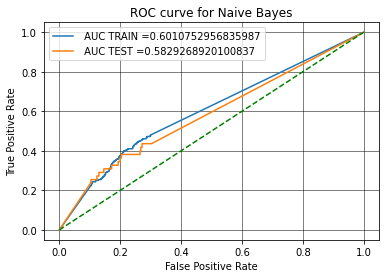

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred,pos_label=1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred, pos_label=1)

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for Naive Bayes")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()